In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Árbol de clasificación

In [2]:
iris = datasets.load_iris()
X,Y = datasets.load_iris(return_X_y=True)
print('X',X.shape)
print('Y',Y.shape)

X (150, 4)
Y (150,)


In [3]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)

In [4]:
model = DecisionTreeClassifier(min_samples_leaf= int(len(Xtrain)*0.1))
model.fit( Xtrain, ytrain  )
tree.export_graphviz(model,out_file='arbol.txt',feature_names=iris.feature_names,
                     class_names=iris.target_names) 
#  http://graphviz.it/

In [5]:
print( iris.feature_names )
print( model.feature_importances_ )

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.         0.         0.99772621 0.00227379]


In [6]:
ypredict = model.predict(Xtest)
print('Accuracy:',accuracy_score(ytest,ypredict))

Accuracy: 0.9777777777777777


# Árbol de regresión

In [7]:
data = datasets.load_boston()
print('datos de entrada:',data.data.shape)
print('datos de salida:',data.target.shape)
print('nombres de variables:',data.feature_names)

X = data.data
Y = data.target
feature_names = data.feature_names

datos de entrada: (506, 13)
datos de salida: (506,)
nombres de variables: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)

In [9]:
model = DecisionTreeRegressor(min_samples_leaf= int(len(Xtrain)*0.1))
model.fit( Xtrain, ytrain  )
tree.export_graphviz(model,out_file='arbol.txt',feature_names=feature_names) 
#  http://graphviz.it/

In [10]:
print( feature_names )
print( np.round(model.feature_importances_,2) )

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[0.   0.   0.   0.   0.   0.66 0.   0.04 0.   0.   0.   0.   0.3 ]


In [11]:
ypredict = model.predict(Xtest)
print('MAE:',mean_absolute_error(ytest,ypredict))

MAE: 3.7448031140986413


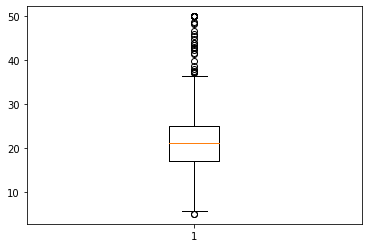

In [12]:
plt.figure()
plt.boxplot(Y)
plt.show()

## Random Forest
Mezcla varios árboles de decisión

In [13]:
data = datasets.load_boston()
print('datos de entrada:',data.data.shape)
print('datos de salida:',data.target.shape)
print('nombres de variables:',data.feature_names)

X = data.data
Y = data.target
feature_names = data.feature_names

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)

datos de entrada: (506, 13)
datos de salida: (506,)
nombres de variables: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [14]:
print('Xtrain',Xtrain.shape)

Xtrain (354, 13)


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
model = DecisionTreeRegressor()
model.fit( Xtrain, ytrain  )
ypredict = model.predict(Xtest)
print('MAE decision tree:',mean_absolute_error(ytest,ypredict))

MAE decision tree: 2.6631578947368424


In [32]:
model = RandomForestRegressor(n_estimators=10)
model.fit( Xtrain, ytrain  )
ypredict = model.predict(Xtest)
print('MAE random forest:',mean_absolute_error(ytest,ypredict))

MAE random forest: 2.190328947368421
